# Co-occurrence matrix

In [2]:
import numpy as np
import re
import pandas as pd

In [3]:
def ConstructCoOccurenceMatrix(text_corpus,window_size,voc = None):
  #Finding Unique words
  if voc==None:
    unique_words = []
    for i in text_corpus:
      unique_words.extend(i)
    unique_words = list(set(unique_words))
    unique_words = sorted(unique_words)
    #print(unique_words)
  else:
    unique_words = voc

  #Construct a nxn matrix
  CoOccurenceMatrix = np.zeros((len(unique_words),len(unique_words)))

  for text in text_corpus:
    for i in range(len(text)):
      for j in range(len(text)):
        if abs(i-j)<=window_size:
          p_index  = unique_words.index(text[i])
          s_index =  unique_words.index(text[j])
          CoOccurenceMatrix[p_index][s_index] += 1

  return unique_words,np.array(CoOccurenceMatrix)

In [4]:
def preprocess(texts):
  result = []
  for text in texts:
    if type(text)==str:
      #lowercasing
      res = re.sub('[^A-Za-z]+', ' ', text)
      res = res.lower()
      result.append(res.split())

  return result

In [5]:
df = pd.read_csv("https://raw.githubusercontent.com/Lordvarun23/PSG-MSc-Data-Science-Lab-Courses/main/Natural%20Language%20Processing/PS-3%5BCoOcuurence%20Matrix%20%26%20Word2Vec%5D/mamogram.csv")
df.head()

,Features,Birads
0,Soft tissue mass lesion (23 x 20 mm) with spic...,4
1,Parenchyma is predominantly FATTY.No distinctl...,1
2,Parenchyma is predominantly GLANDULAR. No dist...,1
3,Parenchyma is predominantly GLANDULAR. No dist...,2
4,Parenchyma is GLANDULAR and FATTY. Small subce...,2


In [25]:
df = df.dropna()

In [6]:
texts = list(df["Features"].values)
text_corpus = preprocess(texts)
unique_words,CoOcuurenceMatrix = ConstructCoOccurenceMatrix(text_corpus,2)

# Eigen Decomposition

In [7]:
import numpy as np
from numpy import linalg as lg

Eigenvalues, Eigenvectors = lg.eigh(CoOcuurenceMatrix)

In [8]:
K = 2
topK_EigenValues = np.argpartition(Eigenvalues,-K)[-K:]
topk_EigenVectors = Eigenvectors[topK_EigenValues]

In [9]:
D = topk_EigenVectors.T
diag_matrix = np.diag(Eigenvalues[topK_EigenValues])

In [10]:
#Reduced Dimensions
reduced_dimension = np.matmul(D,diag_matrix)

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

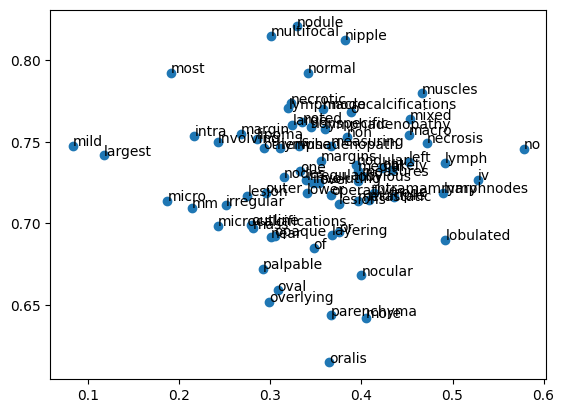

In [14]:
fig, ax = plt.subplots()
X = reduced_dimension[:,0]
Y = reduced_dimension[:,1]
Xstd = (X - min(X))/(max(X)-min(X))
Ystd = (Y - min(Y))/(max(Y)-min(Y))

ax.scatter(Xstd[100:173], Ystd[100:173])

for i in range(100,173):
    ax.annotate(unique_words[i], (Xstd[i],Ystd[i]))

# Word2Vec Representations

In [28]:
import nltk

In [29]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize
import gensim
from gensim.models import Word2Vec
import gensim.downloader

In [ ]:
corpus_text = 'n'.join(df['Features'])
data = []
# iterate through each sentence in the file
for i in sent_tokenize(corpus_text):
    temp = []
    # tokenize the sentence into words
    for j in word_tokenize(i):
        temp.append(j.lower())
    data.append(temp)

## CBOW Model

In [58]:
w2v_model = gensim.models.Word2Vec(data, min_count = 1, window = 5, sg=0)

In [60]:
w2v_vectors = []
w2v_words = []
for word in unique_words:
  try:
    w2v_vectors.append(w2v_model.wv.get_vector(word, norm=True))
    w2v_words.append(word)
  except:
    pass


w2v_vectors = np.array(w2v_vectors)

In [67]:
print("Dimension of CBOW Embedding for a word:",w2v_vectors[0].shape)

Dimension of CBOW Embedding for a word: (100,)


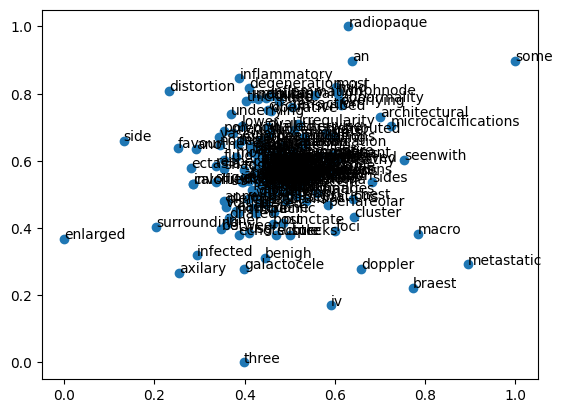

In [66]:
fig, ax = plt.subplots()
X = w2v_vectors[:,0]
Y = w2v_vectors[:,1]
Xstd = (X - min(X))/(max(X)-min(X))
Ystd = (Y - min(Y))/(max(Y)-min(Y))

ax.scatter(Xstd, Ystd)
for i in range(len(Xstd)):
    ax.annotate(w2v_words[i], (Xstd[i],Ystd[i]))

## Skip Gram Model

In [62]:
w2v_model_sg = gensim.models.Word2Vec(data, min_count = 1, window = 5, sg=1)
w2v_vectors_sg = []
w2v_words_sg = []
for word in unique_words:
  try:
    w2v_vectors_sg.append(w2v_model_sg.wv.get_vector(word, norm=True))
    w2v_words_sg.append(word)
  except:
    pass


w2v_vectors_sg = np.array(w2v_vectors_sg)

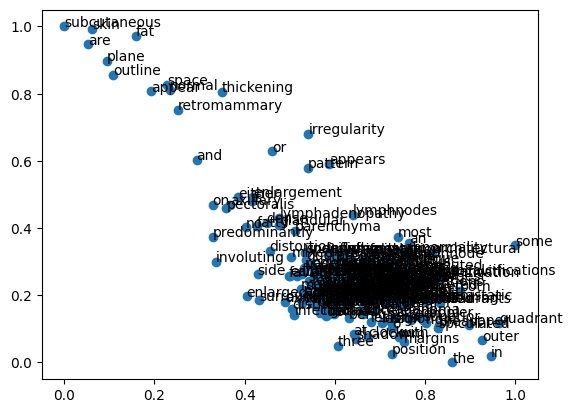

In [63]:
fig, ax = plt.subplots()
X = w2v_vectors_sg[:,0]
Y = w2v_vectors_sg[:,1]
Xstd = (X - min(X))/(max(X)-min(X))
Ystd = (Y - min(Y))/(max(Y)-min(Y))

ax.scatter(Xstd, Ystd)

for i in range(len(Xstd)):
    ax.annotate(w2v_words_sg[i], (Xstd[i],Ystd[i]))

In [68]:
print("Dimension of Skip Gram Embedding for a word:",w2v_vectors_sg[0].shape)

Dimension of Skip Gram Embedding for a word: (100,)
